In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

### Exercise 4.1

#### a)
$q_\pi(s,a)$ =  $\Sigma_{s',r}p(s',r|s,a)[r+\gamma v_\pi(s')]$ $\hspace{1cm}$(Exercise 3.13)

$\rightarrow$ $q_\pi(11,right)$ = $\Sigma_{s',r}p(s',r|11,right)[r+\gamma v_\pi(s')]$  

$ \xrightarrow{s'= s_T : terminal \ state,\ r=-1}$ $q_\pi(11,right)$ = $p(s_T,-1|11,right)[-1+\gamma v_\pi(s_T)]$=
$1*[-1+\gamma * 0]=-1$  

#### b)
$q_\pi(7, down)$ = $\Sigma_{s',r}p(s',r|7, down)[r+\gamma v_\pi(s')]$  
$\hspace{2.05cm}$ = $p(11,-1|7, down)[-1+ v_\pi(11)]$  
$\hspace{2.05cm}$ = $1*[-1 -14]=-15$  

### Exercise 4.2

#### a)
transitions from the original states are unchanged $\rightarrow v_\pi(12)=-22,\ v_\pi(13)=-20,\ v_\pi(14)=-14$  
$v_\pi(15)$ = $\Sigma_{a}\pi(a|15)\Sigma_{s',r}p(s',r|15,a)[r+\gamma\Sigma_{a'}v(s')]$  
$\hspace{1.26cm}$ = $1/4*1*[-1+v_\pi(12)]\ +\ 1/4*1*[-1+v_\pi(13)]\ +\ 1/4*1*[-1+v_\pi(14)]\ +\ 1/4*1*[-1+v_\pi(15)] $  
$\hspace{1.26cm}$ = $-15 +\ 1/4*v_\pi(15)$  

$\rightarrow$ $3/4*v_\pi(15)=-15$  
$\rightarrow$ $v_\pi(15)=-20$

#### b)
First we should find $v_\pi(12),\ v_\pi(13),\ v_\pi(14)$. To find them we iterate on policy evaluation:  
$v_{\pi,new}(13)=1/4\big([-1+v_\pi(12)]+[-1+v_\pi(14)]+[-1+v_\pi(15)]+[-1+v_\pi(9)]\big)$  
$\hspace{1.26cm} = (-22-14-20-20-1-1-1-1)/4=-20\rightarrow v_{\pi,new}(13) = v_{\pi}(13)$  
$\rightarrow v_{\pi,new}(14) = v_{\pi}(14), \ \ v_{\pi,new}(12) = v_{\pi}(12)$  
$\rightarrow v_{\pi,new}(15) = v_{\pi}(15)$  

### Exercise 4.3

$q_\pi(s,a)=\mathbb{E}_\pi[G_t|S_t=s, A_t=a]$  
$\hspace{1.4cm} =  \mathbb{E}_\pi[R_{t+1}+\gamma G_{t+1}|S_t=s, A_t=a]$  
$\hspace{1.4cm} =  \mathbb{E}_\pi[R_{t+1}+\gamma q(S_{t+1},A_{t+1})|S_t=s, A_t=a] \hspace{1cm} ?\sim (4.3)$   
$\hspace{1.4cm} =  \Sigma_{s',r}p(s',r|s,a)[r+\gamma \Sigma_{a'} \pi(a'|s')q_\pi(s',a')]$ $\hspace{1cm} \sim (4.4)$ 

$\rightarrow q_{k+1}(s,a) =  \Sigma_{s',r}p(s',r|s,a)[r+\gamma \Sigma_{a'} \pi(a'|s')q_{k}(s',a')]$ $\hspace{1cm} \sim (4.5)$ 

### Exercise 4.4

1. Initialization  
    V (s) $\in$ R and $\pi(s)$ $\in$ A(s) arbitrarily for all s $\in$ S

2. Policy Evaluation  
$\hspace{0.5cm}$Loop:  
$\hspace{1cm  }\Delta \leftarrow 0$  
$\hspace{1.5cm}$Loop for each s $\in$ S:  
$\hspace{2cm  } v \leftarrow V(s)$  
$\hspace{2cm  } V(s) \leftarrow  \Sigma_{s',r} p(s',r|s,\pi(s))[r+\gamma V(s')] $  
$\hspace{2cm  } \Delta \leftarrow max(\Delta, |v - V (s)|)  $  
$\hspace{0.5cm}$until $\Delta < \theta$ (a small positive number determining the accuracy of estimation)  
$\hspace{0.5cm} \underline{if \Delta =0 \ then \ stop \ and \ return \ V \approx v_* \ and \ \pi \approx \pi_s}$

3. Policy Improvement  
$\hspace{0.5cm}$policy-stable $\leftarrow$ true  
$\hspace{0.5cm}$For each s $\in$ S:  
$\hspace{1cm  }$old-action $\leftarrow \pi(s)$  
$\hspace{1cm  }\pi(s) \leftarrow argmax_a  \Sigma_{s',r} p(s',r|s,\pi(s))[r+\gamma V(s')]$  
$\hspace{0.5cm}$If old-action $\neq$ $\pi(s)$, then policy-stable $\leftarrow$ false  
$\hspace{0.5cm}$If policy-stable, then stop and return $V \approx v_*$ and $\pi \approx \pi_s$; else go to 2

### Exercise 4.5

1. Initialization  
    Q (s,a) $\in$ R and $\pi(s)$ $\in$ A(s) arbitrarily for all a $\in$ A(s) and all s $\in$ S 

2. Policy Evaluation  
$\hspace{0.5cm}$Loop:  
$\hspace{1cm  }\Delta \leftarrow 0$  
$\hspace{1.5cm}$Loop for each s $\in$ S:  
$\hspace{2cm  }$Loop for each a $\in$ A(s):  
$\hspace{2.5cm} q \leftarrow Q(s,a)$  
$\hspace{2.5cm} Q(s,a) \leftarrow  \Sigma_{s',r} p(s',r|s,a)[r+\gamma\Sigma_a' \pi(a'|s')Q(s',a')] $  
$\hspace{2cm  } \Delta \leftarrow max(\Delta, |q - Q(s,q)|)  $  
$\hspace{0.5cm}$until $\Delta < \theta$ (a small positive number determining the accuracy of estimation)  
$\hspace{0.5cm} if \Delta =0 \ then \ stop \ and \ return \ Q \approx q_* \ and \ \pi \approx \pi_s$

3. Policy Improvement  
$\hspace{0.5cm}$policy-stable $\leftarrow$ true  
$\hspace{0.5cm}$For each s $\in$ S:  
$\hspace{1cm  }$old-action $\leftarrow \pi(s)$  
$\hspace{1cm  }\pi(s) \leftarrow argmax_a  Q(s,a)$  
$\hspace{0.5cm}$If old-action $\neq$ $\pi(s)$, then policy-stable $\leftarrow$ false  
$\hspace{0.5cm}$If policy-stable, then stop and return $V \approx v_*$ and $\pi \approx \pi_s$; else go to 2

### Exercise 4.6

1. Initialization  
    V (s) $\in$ R and $\pi(a|s)$ $\in$ A(s) arbitrarily for all s $\in$ S

2. Policy Evaluation  
$\hspace{0.5cm}$Loop:  
$\hspace{1cm  }\Delta \leftarrow 0$  
$\hspace{1.5cm}$Loop for each s $\in$ S:  
$\hspace{2cm  } v \leftarrow V(s)$  
$\hspace{2cm  } V(s) \leftarrow  \Sigma_a \pi(a|s) \Sigma_{s',r} p(s',r|s,\pi(s))[r+\gamma V(s')] $  
$\hspace{2cm  } \Delta \leftarrow max(\Delta, |v - V (s)|)  $  
$\hspace{0.5cm}$until $\Delta < \theta$ (a small positive number determining the accuracy of estimation)  
$\hspace{0.5cm} \underline{if \Delta =0 \ then \ stop \ and \ return \ V \approx v_* \ and \ \pi \approx \pi_s}$

3. Policy Improvement  
$\hspace{0.5cm}$policy-stable $\leftarrow$ true  
$\hspace{0.5cm}$For each s $\in$ S:  
$\hspace{1  cm}$For each a $\in$ A(s):  
$\hspace{1.5cm}$old-action $\leftarrow \pi(a|s)$  
$\hspace{1.5cm}$If $a = argmax_a  \Sigma_{s',r} p(s',r|s,\pi(s))[r+\gamma V(s')]$  then $\pi(a|s)=1- \frac{\epsilon(|A(s)|-1)}{|A(s)|}$, else
$\pi(a|s)=\frac{\epsilon}{|A(s)|}$  
$\hspace{1  cm}$If old-action $\neq$ $\pi(s)$, then policy-stable $\leftarrow$ false  
$\hspace{0.5cm}$If policy-stable, then stop and return $V \approx v_*$ and $\pi \approx \pi_s$; else go to 2

### Exercise 4.7

original problem

In [2]:
def debug(data):
    print(data)
#     sleep(0.3)
    clear_output(wait=True)

In [3]:
# Poisson random variables
def prv(n, λ):
    return (λ**n)*np.exp(-λ)/np.math.factorial(n)

In [4]:
def Σ(s, a, V, γ=0.9, location_size=20): 
    
    # transient state after moving some (a maximum of 5) cars between the two location overnight
    sₜ= (s[0]+a, s[1]-a)
    sumation = 0
    for return_1 in range(location_size - sₜ[0]):
        for return_2 in range(location_size - sₜ[1]):
            for rent_1 in range(sₜ[0] + return_1):
                for rent_2 in range(sₜ[1] + return_2):
                    # immediate reward: negative reward of moving cars overnight and positive reward of renting cars
                    r = -2*abs(a) + 10*(rent_1 + rent_2)
                    # next state
                    sₙ = (s[0]+a+return_1-rent_1, s[1]-a+return_2-rent_2)
                    sumation = sumation +  prv(return_1, 3)*prv(return_2, 2)*prv(rent_1, 3)*prv(rent_2, 4)*(r + γ*V[sₙ])
    return sumation

In [5]:
S = [(i,j) for i in range(20+1) for j in range(20+1)]

In [6]:
def policy_iteration(location_size=20): 
    
    #1. Initialization  
    V = np.zeros(shape=(location_size, location_size))
    π = np.zeros(shape=(location_size, location_size),dtype=np.int)
    π_set = np.zeros(shape=(1, location_size, location_size),dtype=np.int)
    S = [(i,j) for i in range(location_size) for j in range(location_size)]
    # discount rate 
    γ = 0.9
    # a small positive number determining the accuracy of estimation
    θ = 10
    
    for i in range(4):
        x = 0
        # 2. Policy Evaluation  
        while True:
            Δ = 0 
            x = x+1
            for s in S:
                v = V[s]
                V[s] = Σ(s, π[s], V, γ, location_size)
                Δ = max(Δ, abs(v-V[s]))
                debug("iter: " + str(x) + "\n " + "state: " + str(s) + "\n " +
                      "Δ: " + str(Δ) + "\n " + "V[s]: " + str(V[s])
                      + "\n " + str(π) )
            if Δ < θ :
                break
        
        # 3. Policy Improvement                 
        policy_stable = True
        for s in S:
            old_action = π[s]
            # m1 : maximum number of car to be moved to location 1 from location 2
            m1 = min(5, location_size-s[0], s[1])
            # m2 : maximum number of car to be moved to location 2 from location 1
            m2 = min(5, location_size-s[1], s[0])
            A = range(-m2, m1)
            maximum_π = 0
            for a in A:
                sumation = Σ(s, a, V, γ, location_size)
                if sumation>maximum_π:
                    maximum_π = sumation
                    π[s] = a
            if old_action != π[s]:
                policy_stable = False
        π_set = np.append(π_set,[π],0)
#         if policy_stable:
#             return V, π_set
    return V, π_set

In [7]:
location_size = 20
result = policy_iteration(location_size)

iter: 1
 state: (19, 19)
 Δ: 5.418243024039782
 V[s]: 1.801736248854479
 [[ 0  0  0  0  1  1  2  2  3  3  4  4  4  4  4  4  4  4  4  4]
 [-1 -1  0  0  0  1  1  2  2  3  3  4  4  4  4  4  4  4  4  4]
 [-2 -1 -1  0  0  0  1  1  2  2  3  3  3  4  4  4  4  4  4  4]
 [-2 -2 -1 -1  0  0  0  1  1  2  2  2  3  3  3  4  4  4  4  4]
 [-3 -2 -2 -1 -1  0  0  0  1  1  1  2  2  2  3  3  4  4  4  4]
 [-3 -3 -2 -2 -1 -1  0  0  0  0  1  1  1  2  2  3  3  4  4  4]
 [-4 -3 -3 -2 -2 -1 -1  0  0  0  0  0  1  1  2  2  3  4  4  4]
 [-4 -4 -3 -3 -2 -2 -1 -1  0  0  0  0  0  1  1  2  3  4  4  4]
 [-5 -4 -4 -3 -3 -2 -2 -1 -1  0  0  0  0  0  1  2  3  3  4  4]
 [-5 -5 -4 -4 -3 -3 -2 -2 -1  0  0  0  0  0  1  2  2  3  4  4]
 [-5 -5 -5 -4 -4 -3 -3 -2 -1 -1  0  0  0  0  1  1  2  3  3  4]
 [-5 -5 -5 -5 -4 -4 -3 -2 -2 -1 -1  0  0  0  0  1  2  2  3  3]
 [-5 -5 -5 -5 -5 -4 -3 -3 -2 -2 -1 -1 -1  0  0  1  1  2  2  3]
 [-5 -5 -5 -5 -5 -4 -4 -3 -3 -2 -2 -2 -1 -1  0  0  1  1  2  3]
 [-5 -5 -5 -5 -5 -5 -4 -4 -3 -3 -3 -2 -2 -1 -

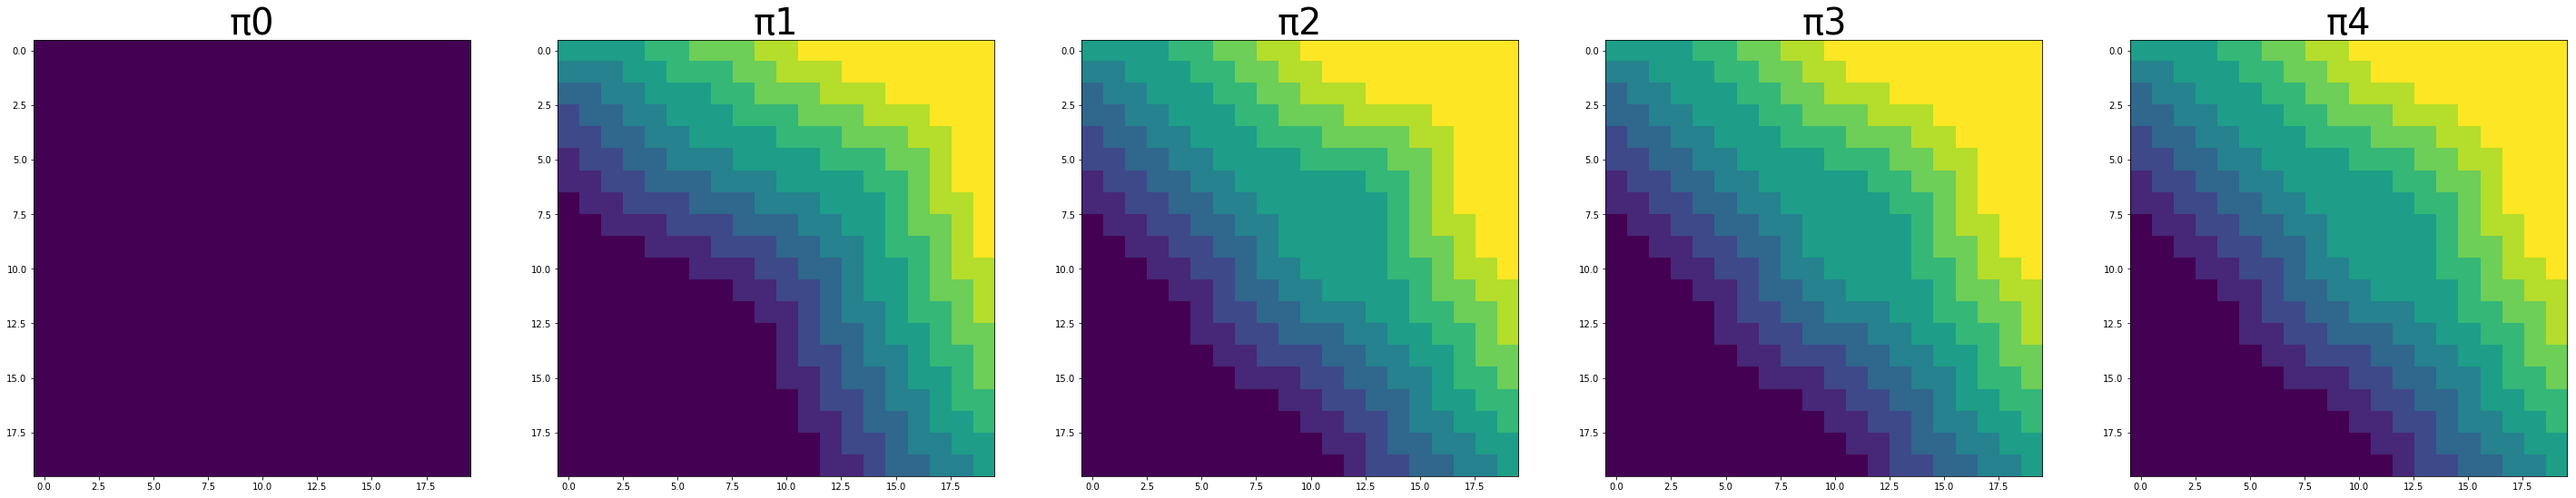

In [8]:
plt.figure(figsize=(50,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(result[1][i])
    plt.title("π"+str(i), fontsize=40)

### Exercise 4.8 

$\rightarrow Exercise 4.9$

### Exercise 4.9

In [9]:
def debug(data):
    print(data)
#     sleep(0.1)
    clear_output(wait=True)

In [10]:
def value_iteration(ph = 0.25, θ = 0.001):
    
    #1. Initialization  
    S = [i for i in range(101)]
    V = np.zeros(shape=(len(S)))
    Q = np.zeros(shape=(len(S),len(S)))
    π = np.zeros(shape=(len(S)),dtype=np.int)
    π_set = np.zeros(shape=(1, len(S)),dtype=np.int)
    V_set = np.zeros(shape=(1, len(S)),dtype=np.int)
    
    x = 0
    # 2. Policy Evaluation  & Policy Improvement 
    while True:
        Δ = 0
        x = x+1
        for s in S:
            v = V[s]

            if s==0:
                V[s]=0
            elif s==100:
                V[s]=0
            else:
                A = range(0, min(s, 100-s)+1)
                maximum_π = 0
                for a in A:
                    if s+a==100:
                        r=1
                    else:
                        r=0
                    
                    sumation = ph*(r+V[s+a]) + (1-ph)*(0+V[s-a])
                    Q[s,a] = sumation
                    if sumation>maximum_π:
                        maximum_π = sumation
                        V[s] = sumation
                        π[s] = a
                
            Δ = max(Δ, abs(v-V[s]))
            
        π_set = np.append(π_set,[π],0)
        V_set = np.append(V_set,[V],0)
        if Δ < θ :
            break
    return V_set, π_set, Q

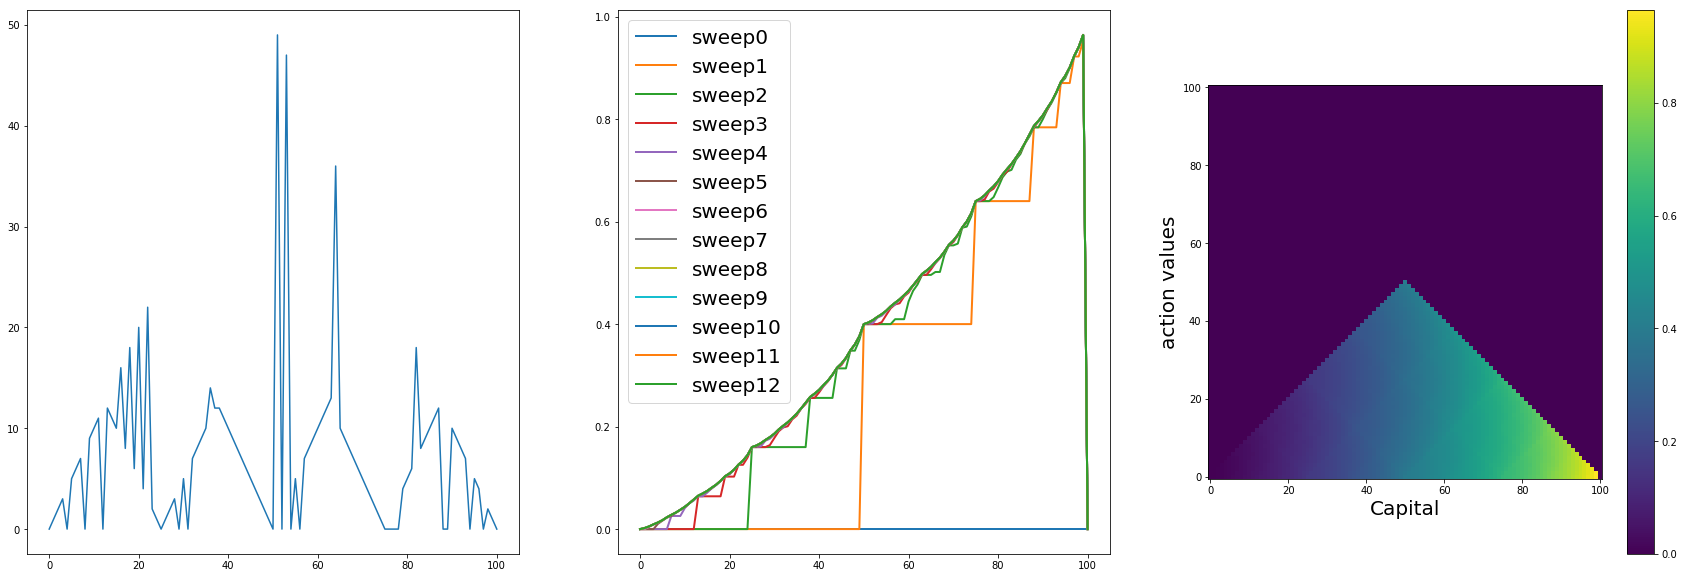

In [11]:
result = value_iteration(0.4, θ = 0.000001)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(result[1][-1])

plt.subplot(1,3,2)
for i in range(result[0].shape[0]):
    plt.plot(result[0][i], label="sweep"+str(i), linewidth=2)
plt.legend(fontsize=20)

plt.subplot(1,3,3)
plt.imshow(result[2].T)
plt.gca().invert_yaxis()
plt.xlabel("Capital", fontsize=20)
plt.ylabel("action values", fontsize=20)
plt.colorbar()

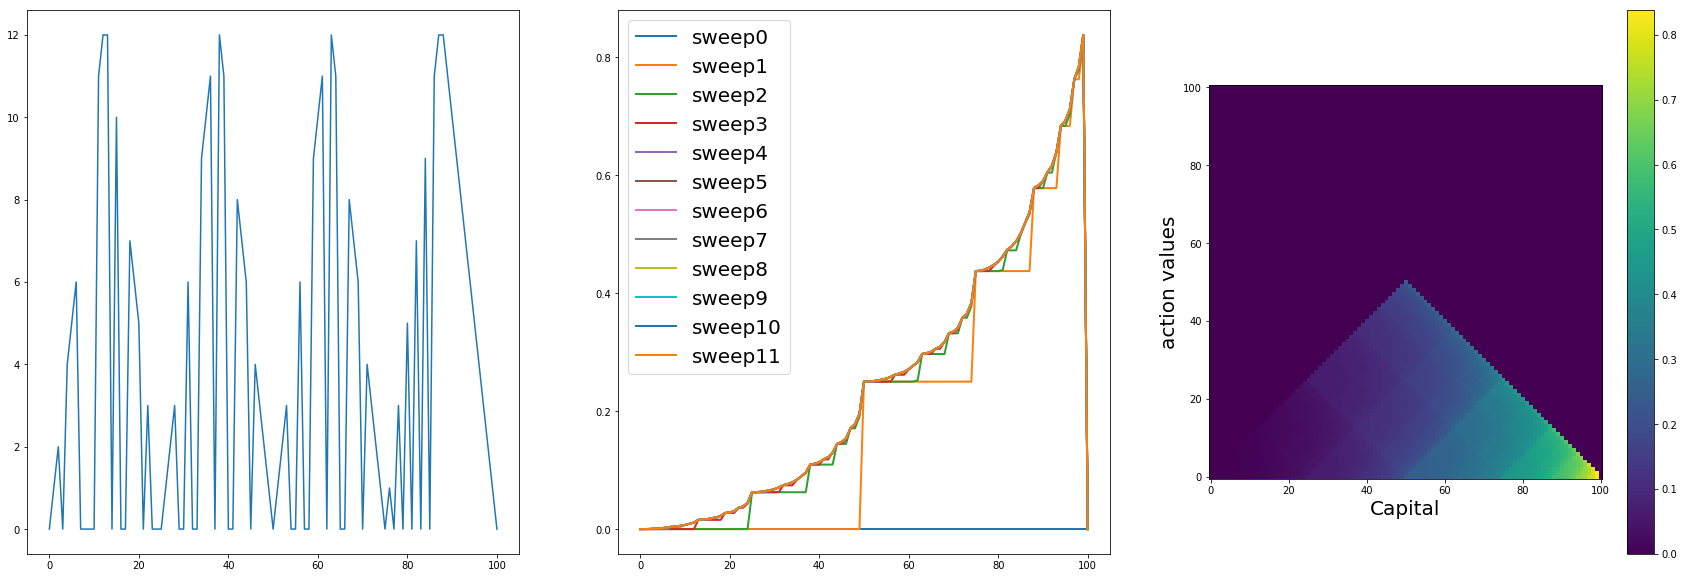

In [10]:
result = value_iteration(0.25, θ = 0.000001)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(result[1][-1])

plt.subplot(1,3,2)
for i in range(result[0].shape[0]):
    plt.plot(result[0][i], label="sweep"+str(i), linewidth=2)
plt.legend(fontsize=20)

plt.subplot(1,3,3)
plt.imshow(result[2].T)
plt.gca().invert_yaxis()
plt.xlabel("Capital", fontsize=20)
plt.ylabel("action values", fontsize=20)
plt.colorbar()

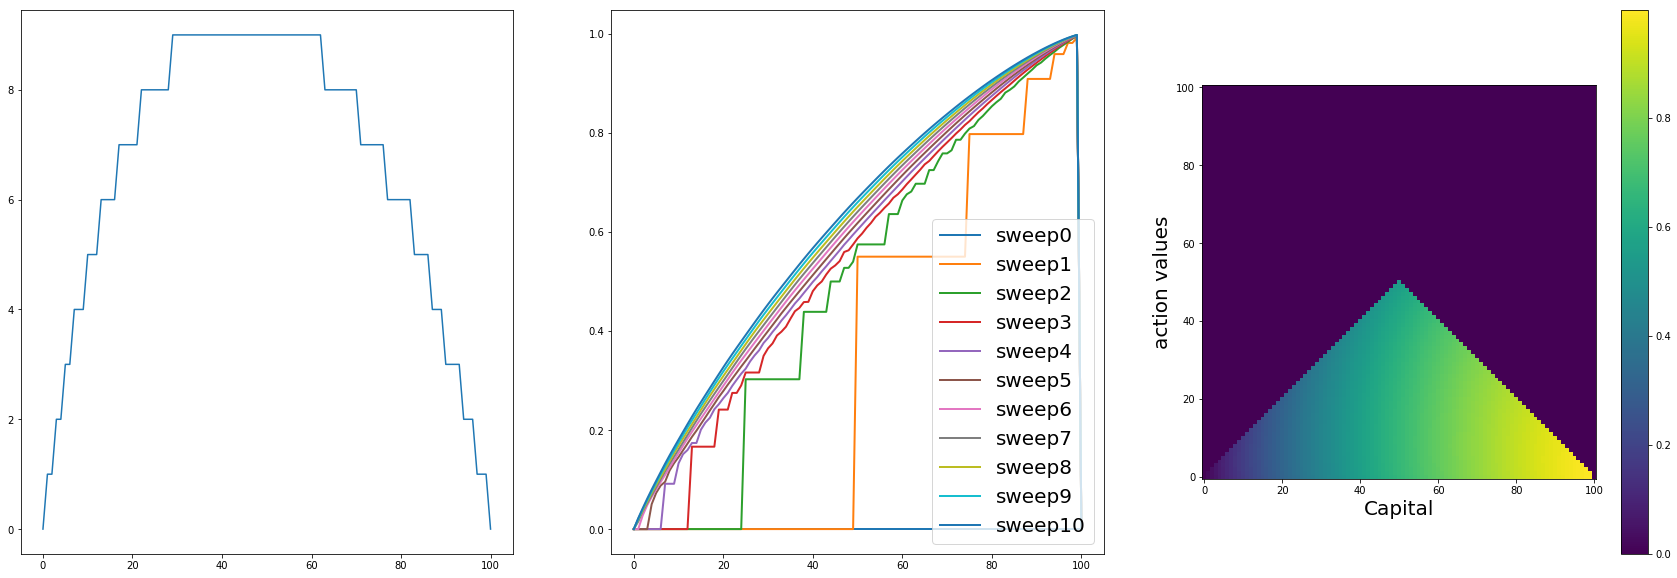

In [12]:
result = value_iteration(0.55, θ = 0.01)

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(result[1][-1])

plt.subplot(1,3,2)
for i in range(result[0].shape[0]):
    plt.plot(result[0][i], label="sweep"+str(i), linewidth=2)
plt.legend(fontsize=20)

plt.subplot(1,3,3)
plt.imshow(result[2].T)
plt.gca().invert_yaxis()
plt.xlabel("Capital", fontsize=20)
plt.ylabel("action values", fontsize=20)
plt.colorbar()

### Exercise 4.10

$q_{k+1}(s,a) = \Sigma_{s',r}p(s',r|s,a)[r+\gamma \max_{a'}q_\pi(s',a')]$ $\hspace{1cm}$ ($\rightarrow$ Bellman optimality equations (4.2))